In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [149]:
df = pd.read_csv("city_united.csv")
df.head() # выведем первые 5 строк

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30


In [150]:
df.drop_duplicates() # удалим дубликаты

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [151]:
df.info() # нет пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

Столбцы с 0 по 2 представлены категориальными признаками, в дальнейшем их нужно будет закодировать. Остальные столбцы представлены количественными признаками, посмотрим на их описательные статистики: 

In [152]:
df.describe()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,6.495746,6.229401,5.290508,3.309412,3.599040,4.866551,7.351622,6.882995,6.713970,3.958158,5.921802,5.129420,5.137540,5.262578,6.236850,6.667652,4.705142,141.552995
std,2.379285,2.122468,2.080873,2.632871,2.071882,1.065340,1.938925,1.768298,1.363514,2.298448,2.116146,1.481395,1.727538,1.857796,1.836031,1.762681,1.547604,35.340590
min,0.000000,0.000000,0.000000,0.000000,0.814500,0.000000,1.000000,1.343500,2.862333,0.000000,1.000000,0.000000,1.426000,1.000000,0.000000,1.406000,0.500000,35.220000
25%,5.214000,4.974500,3.784250,1.557000,1.905000,4.512375,5.763000,5.972750,6.029167,2.090500,4.331875,4.103000,4.062000,4.215750,4.961250,5.737250,4.053000,116.795000
50%,6.555000,5.882000,4.937500,2.870000,3.149500,5.084500,8.345667,7.134500,6.681000,4.280500,6.215750,5.438000,4.772000,5.418500,6.338500,7.030000,4.978000,148.590000
75%,8.438250,7.951500,6.321500,4.579500,4.784500,5.524625,8.836667,8.146000,7.997167,5.383750,7.698500,6.514500,6.038750,6.329750,7.379250,7.931500,5.650500,169.600000
max,10.000000,10.000000,10.000000,10.000000,10.000000,6.295500,10.000000,10.000000,8.916333,9.711000,9.609250,9.390000,10.000000,9.716000,10.000000,9.710000,7.933000,200.030000


Выбросов, например, отрицательные значения, не наблюдаю. Большинство количественных переменных варьируется от 0 до 10 

Целевая переменная - индекс качества жизни

In [153]:
X = df.drop(["Quality of Life Index"], axis=1)
y = df[["Quality of Life Index"]]

In [154]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [155]:
categorial = ['UA_Name', 'UA_Country', 'UA_Continent']

from sklearn.preprocessing import OneHotEncoder # приступаем к кодированию качественных переменных

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_X[categorial])

features_name = enc.get_feature_names_out(categorial)
train_X[features_name]= enc.transform(train_X[categorial]).toarray()
train_X = train_X.drop(categorial, axis=1)
test_X[features_name]= enc.transform(test_X[categorial]).toarray()
test_X = test_X.drop(categorial, axis=1)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [156]:
train_X

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,...,UA_Country_ Vietnam,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
67,6.7295,5.522,4.6240,2.392,1.9020,5.09725,8.966000,7.1175,8.269000,5.9480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
65,7.1560,5.595,4.9610,3.646,2.0775,4.42125,8.671000,3.6370,6.755667,4.6185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
114,8.6310,6.301,3.4070,0.000,1.6060,5.49125,7.438667,8.1025,6.758667,2.4750,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
104,6.4555,5.049,5.7695,4.908,6.3975,4.72800,8.992000,6.7725,8.519000,5.6520,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120,1.0000,3.940,10.0000,9.859,9.4025,5.39550,8.992000,7.2435,8.018000,9.0270,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4.9100,4.370,7.3265,9.160,3.3450,4.99425,6.790000,8.0065,8.338000,3.7665,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,6.2520,5.125,3.5405,3.017,4.8075,6.03175,8.836667,9.1070,8.559333,5.0805,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92,2.1315,6.183,2.6875,0.000,2.6425,4.61625,7.408333,9.4860,7.433667,1.4335,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
179,4.9025,9.820,3.0535,0.000,1.3235,4.54425,1.000000,5.2210,4.178333,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [157]:
test_X

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,...,UA_Country_ Vietnam,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
185,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,6.4345,4.297667,0.0000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
78,5.6570,3.431,6.2970,3.963,8.1515,6.00750,8.377667,10.0000,8.826333,6.9805,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55,5.5145,4.902,3.9875,2.870,2.3615,5.50425,8.345667,8.8395,7.426333,4.8790,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
137,9.2315,9.315,4.6180,0.000,0.9280,5.35450,6.348667,7.4770,6.790667,1.5310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
161,8.3605,8.673,4.9825,0.000,5.8805,4.62600,5.547000,7.7930,4.952000,4.2820,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,9.3060,8.550,4.6910,3.155,2.6665,5.62200,5.295333,7.5505,5.586667,2.0145,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
178,8.3200,7.751,4.8230,2.414,1.4930,4.55325,4.036667,5.2955,4.849667,1.0175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,9.0665,7.670333,7.2875,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
115,2.5125,4.005,5.6510,6.204,4.7615,5.44625,8.345667,7.1215,6.810333,5.6065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Успешно!

In [158]:
reg = LinearRegression().fit(train_X, train_y) # строим модель
predictions = reg.predict(test_X)
print(f'MSE: {mean_squared_error(predictions, test_y)}')
print('R2 Score:', r2_score(predictions, test_y))

MSE: 4.6543869455681555e+26
R2 Score: -0.19120696100137025


In [159]:
print(reg.score(train_X, train_y))
print(reg.score(test_X, test_y))

0.9867110913001086
-3.702236694566136e+23


Плохое качество модели

Перейдем к построению полиномиальной модели

In [160]:
poly = PolynomialFeatures(2) 
train_X = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out(train_X.columns))
test_X = pd.DataFrame(poly.transform(test_X), columns=poly.get_feature_names_out())

In [161]:
train_X

,1,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,...,UA_Continent_Europe^2,UA_Continent_Europe UA_Continent_North America,UA_Continent_Europe UA_Continent_Oceania,UA_Continent_Europe UA_Continent_South America,UA_Continent_North America^2,UA_Continent_North America UA_Continent_Oceania,UA_Continent_North America UA_Continent_South America,UA_Continent_Oceania^2,UA_Continent_Oceania UA_Continent_South America,UA_Continent_South America^2
0,1.0,6.7295,5.522,4.6240,2.392,1.9020,5.09725,8.966000,7.1175,8.269000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.1560,5.595,4.9610,3.646,2.0775,4.42125,8.671000,3.6370,6.755667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.6310,6.301,3.4070,0.000,1.6060,5.49125,7.438667,8.1025,6.758667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6.4555,5.049,5.7695,4.908,6.3975,4.72800,8.992000,6.7725,8.519000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0000,3.940,10.0000,9.859,9.4025,5.39550,8.992000,7.2435,8.018000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.0,4.9100,4.370,7.3265,9.160,3.3450,4.99425,6.790000,8.0065,8.338000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,1.0,6.2520,5.125,3.5405,3.017,4.8075,6.03175,8.836667,9.1070,8.559333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,1.0,2.1315,6.183,2.6875,0.000,2.6425,4.61625,7.408333,9.4860,7.433667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,1.0,4.9025,9.820,3.0535,0.000,1.3235,4.54425,1.000000,5.2210,4.178333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


125 столбцов... Нужно отобрать столбцы

Рассчитаем значения Шепли

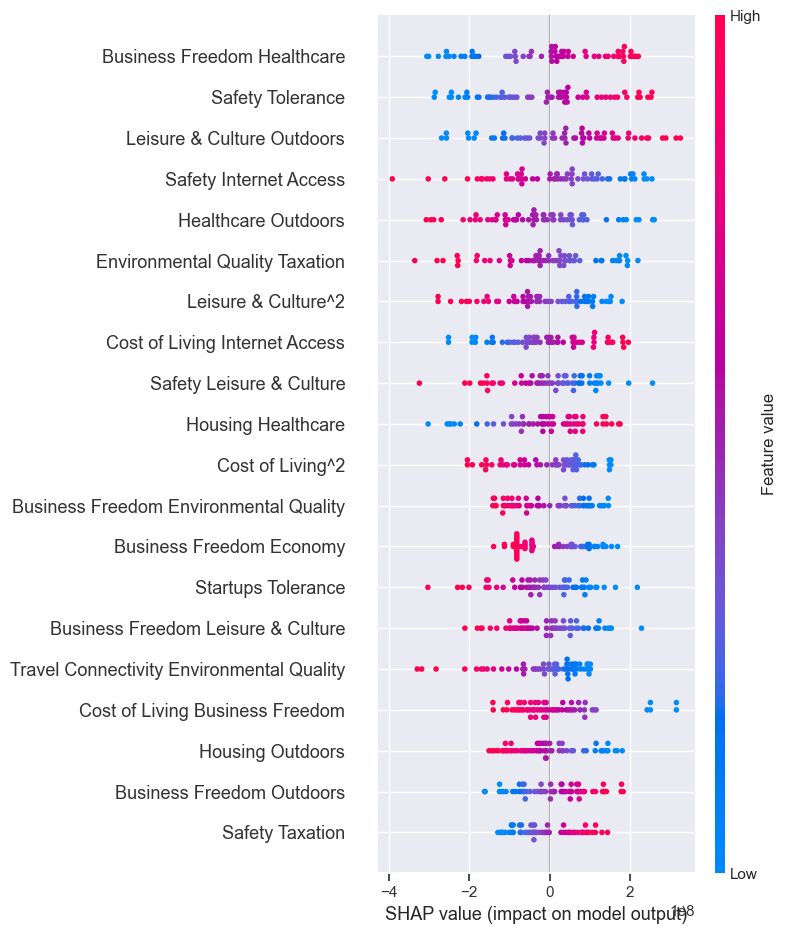

In [162]:
import shap
reg = LinearRegression().fit(train_X, train_y)
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)
shap.summary_plot(shap_values, test_X)

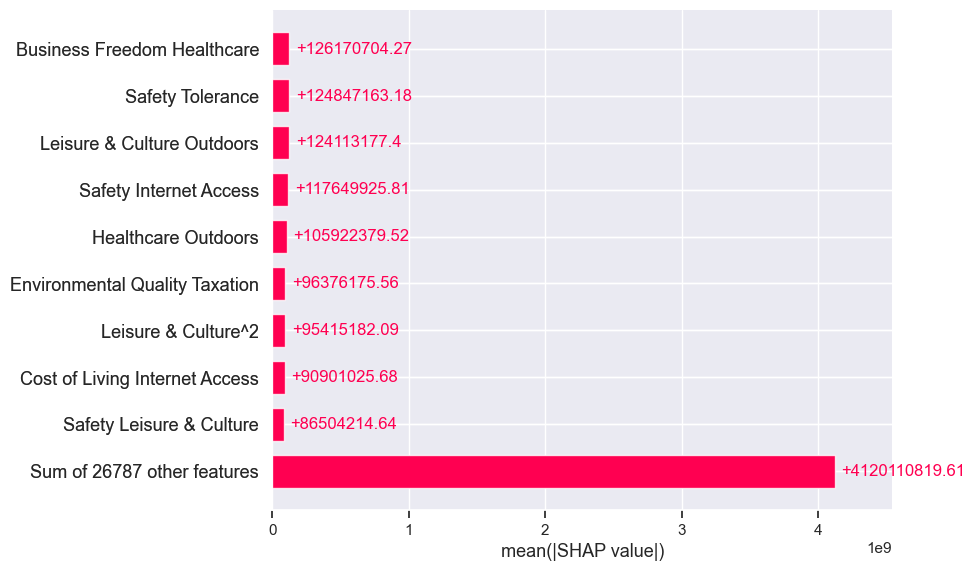

In [163]:
shap.plots.bar(shap_values)

In [164]:
test_X = test_X[['Business Freedom Healthcare', 'Safety Tolerance', 'Leisure & Culture Outdoors', 'Safety Internet Access', 'Healthcare Outdoors', 'Environmental Quality Taxation', 'Leisure & Culture^2', 'Cost of Living Internet Access', 'Safety Leisure & Culture']]
train_X = train_X[['Business Freedom Healthcare', 'Safety Tolerance', 'Leisure & Culture Outdoors', 'Safety Internet Access', 'Healthcare Outdoors', 'Environmental Quality Taxation', 'Leisure & Culture^2', 'Cost of Living Internet Access', 'Safety Leisure & Culture']]

In [165]:
reg = LinearRegression().fit(train_X, train_y)

In [166]:
reg.score(train_X, train_y)

0.7298940694809481

In [167]:
reg.score(test_X, test_y)

0.6456988460125818

In [168]:
mean_squared_error(reg.predict(train_X), train_y)

333.5420593208404

In [169]:
mean_squared_error(reg.predict(test_X), test_y)

445.42118777525235

In [170]:
print('R2 Score:', r2_score(test_y, reg.predict(test_X)))

R2 Score: 0.6456988460125818


Коэффициент детерминации R2 равен 0.646, что означает, что примерно 64.6% изменчивости зависимой переменной может быть объяснено независимыми переменными в модели. Это говорит о том, что модель хорошо подходит для объяснения данных